### 学习Overfitting的样例代码：利用一阶多项式函数拟合正弦曲线产生的带噪音数据；

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm  
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
E:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
x = np.linspace(0, 1, 101, endpoint=True)  
f = lambda z: np.sin(2*np.pi*z)  # 待拟合的正弦函数
y = f(x)  # 生成纵坐标y

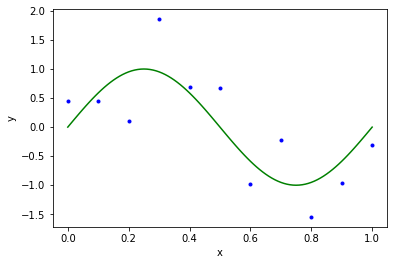

In [3]:
# 生成训练数据
np.random.seed(247)  # 设置随机种子
x_train = np.linspace(0, 1, 11, endpoint=True)
# 因为观测通常有噪声，为每个样本点加入独立的，服从(0, 0.6)正态分布的噪声
y_train = f(x_train) + np.random.normal(0, 0.6, 11)  

# 绘制正弦曲线及带噪声数据的散点图
fig = plt.figure(1)
plt.plot(x, y, 'g-')  # 绘制正弦图像
plt.plot(x_train, y_train, 'b.')  # 绘制观测样本点
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 一阶

In [4]:
X_train1 = sm.add_constant(x_train)  
model1 = sm.OLS(y_train, X_train1)
result1 = model1.fit()  # 拟合数据

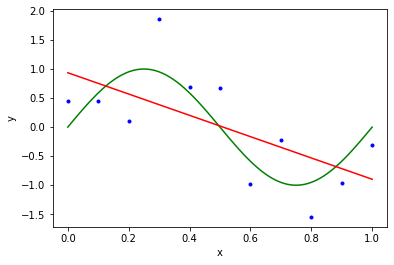

In [5]:
fig = plt.figure(2)
plt.plot(x, y, 'g-')
# 根据计算得到的参数(result1.params)来得到预测的 y
# 同样这里也需要为x增加常数列(1)
# y = β1 * 1 + β2 * x
plt.plot(x, sm.add_constant(x).dot(result1.params), 'r-')
plt.plot(x_train, y_train, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 二阶

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [17]:
def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    linear_regression = LinearRegression(normalize=True)  #normalize=True对数据归一化处理
    pipeline = Pipeline([("polynomial_features", polynomial_features),#添加多项式特征
                         ("linear_regression", linear_regression)])
    return pipeline

In [22]:
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [43]:
degrees = [2]
results = []
for d in degrees:
    model = polynomial_model(degree=d)
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)  
    results.append({"model": model, "degree": d, "score": train_score})
for r in results:
    print("degree: {}; train score: {}".format(r["degree"], r["score"]))

degree: 2; train score: 0.42645597760858744


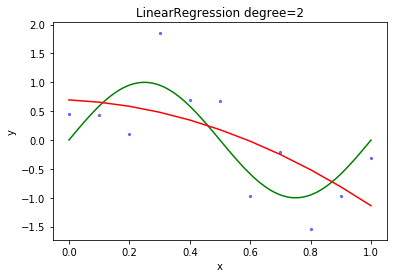

In [44]:
fig = plt.figure(4)
plt.plot(x, y, 'g-')
plt.title("LinearRegression degree={}".format(r["degree"]))
plt.scatter(x_train,y_train,s=5,c='b',alpha=0.5)
plt.plot(x_train,r["model"].predict(x_train),'r-') 
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 正常操作

In [6]:
X2 = np.column_stack((x_train,x_train**2))
X_train2 = sm.add_constant(X2)       #增加常数列
model2 = sm.OLS(y_train,X_train2)   #在反应变量和回归变量上使用OLS（）函数
result2 = model2.fit()         #拟合数据

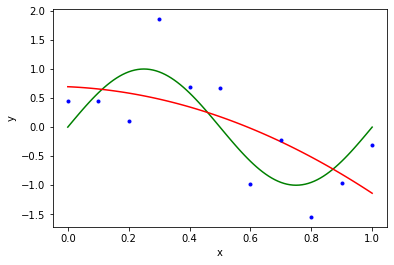

In [9]:
fig = plt.figure(2) 
plt.plot(x,y,'g-')
# 根据计算得到的参数(result1.params)来得到预测的 y
# 同样这里也需要为x增加常数列(1)
# y = β1 * 1 + β2 * x
plt.plot(x, sm.add_constant(np.column_stack((x,x**2))).dot(result2.params), 'r-')
plt.plot(x_train, y_train, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 三阶

In [39]:
degrees = [3]
results = []
for d in degrees:
    model = polynomial_model(degree=d)
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)  
    results.append({"model": model, "degree": d, "score": train_score})
for r in results:
    print("degree: {}; train score: {}".format(r["degree"], r["score"]))

degree: 3; train score: 0.6456238721358474


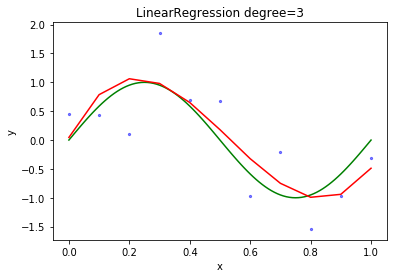

In [42]:
fig = plt.figure(4)
plt.plot(x, y, 'g-')
plt.title("LinearRegression degree={}".format(r["degree"]))
plt.scatter(x_train,y_train,s=5,c='b',alpha=0.5)
plt.plot(x_train,r["model"].predict(x_train),'r-') 
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 正常操作

In [10]:
X3 = np.column_stack((x_train,x_train**2,x_train**3))
X_train3 = sm.add_constant(X3)       #增加常数列
model3 = sm.OLS(y_train,X_train3)   #在反应变量和回归变量上使用OLS（）函数
result3 = model3.fit()         #拟合数据

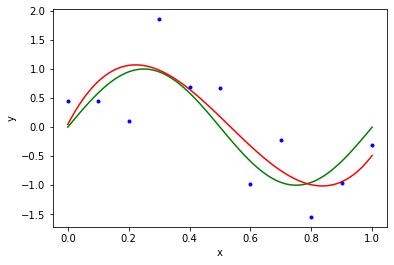

In [11]:
fig = plt.figure(2) 
plt.plot(x,y,'g-')
# 根据计算得到的参数(result1.params)来得到预测的 y
# 同样这里也需要为x增加常数列(1)
# y = β1 * 1 + β2 * x
plt.plot(x, sm.add_constant(np.column_stack((x,x**2,x**3))).dot(result3.params), 'r-')
plt.plot(x_train, y_train, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 四阶

In [45]:
degrees = [4]
results = []
for d in degrees:
    model = polynomial_model(degree=d)
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)  
    results.append({"model": model, "degree": d, "score": train_score})
for r in results:
    print("degree: {}; train score: {}".format(r["degree"], r["score"]))

degree: 4; train score: 0.7190467150783322


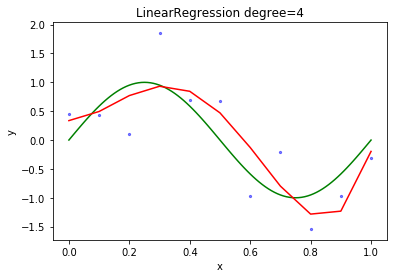

In [46]:
fig = plt.figure(4)
plt.plot(x, y, 'g-')
plt.title("LinearRegression degree={}".format(r["degree"]))
plt.scatter(x_train,y_train,s=5,c='b',alpha=0.5)
plt.plot(x_train,r["model"].predict(x_train),'r-') 
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 正常操作

In [12]:
X4 = np.column_stack((x_train,x_train**2,x_train**3,x_train**4))
X_train4 = sm.add_constant(X4)       #增加常数列
model4 = sm.OLS(y_train,X_train4)   #在反应变量和回归变量上使用OLS（）函数
result4 = model4.fit()         #拟合数据

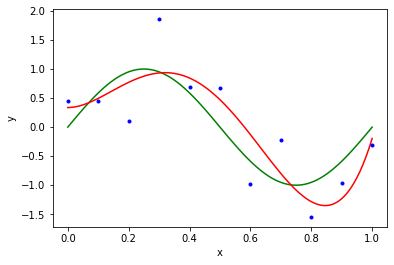

In [13]:
fig = plt.figure(2) 
plt.plot(x,y,'g-')
# 根据计算得到的参数(result1.params)来得到预测的 y
# 同样这里也需要为x增加常数列(1)
# y = β1 * 1 + β2 * x
plt.plot(x, sm.add_constant(np.column_stack((x,x**2,x**3,x**4))).dot(result4.params), 'r-')
plt.plot(x_train, y_train, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 十阶

In [49]:
degrees = [10]
results = []
for d in degrees:
    model = polynomial_model(degree=d)
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)  
    results.append({"model": model, "degree": d, "score": train_score})
for r in results:
    print("degree: {}; train score: {}".format(r["degree"], r["score"]))

degree: 10; train score: 1.0


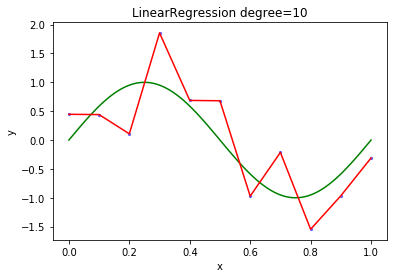

In [50]:
fig = plt.figure(4)
plt.plot(x, y, 'g-')
plt.title("LinearRegression degree={}".format(r["degree"]))
plt.scatter(x_train,y_train,s=5,c='b',alpha=0.5)
plt.plot(x_train,r["model"].predict(x_train),'r-') 
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 正常操作

In [14]:
X10 = np.column_stack((x_train,x_train**2,x_train**3,x_train**4,x_train**5,x_train**6,x_train**7,x_train**8,x_train**9,x_train**10))
X_train10 = sm.add_constant(X10)       #增加常数列
model10 = sm.OLS(y_train,X_train10)   #在反应变量和回归变量上使用OLS（）函数
result10 = model10.fit()         #拟合数据

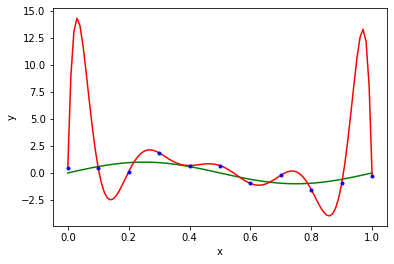

In [15]:
fig = plt.figure(2) 
plt.plot(x,y,'g-')
# 根据计算得到的参数(result1.params)来得到预测的 y
# 同样这里也需要为x增加常数列(1)
# y = β1 * 1 + β2 * x
plt.plot(x, sm.add_constant(np.column_stack((x,x**2,x**3,x**4,x**5,x**6,x**7,x**8,x**9,x**10))).dot(result10.params), 'r-')
plt.plot(x_train, y_train, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()